# Lending Club Case Study

## Below is the High Level Glimpse of the Overall Use Case.

### Problem Statement
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures, which allows borrowers to easliy get the loan on low interest.

Credit loss may happen to the company if application refuses to pay or the applicant defaults.
Approving loans to ‘risky’ applicants may result into loss to the company, if applicant doesn't pay the loan on time.

### Goal
Minimize the Credit loss to the Company by identifing the Applicant's Profile that may be defaulter's later on.

### Outcome
We need to use Exploratory Data Analysis to identify the driving factors which can help to find the these risky profiles.

# The Overall Analysis is devided into certain broader categories

# 1. Data Understanding

### Data Field Analysis
1. This Data Contains Many columns which has NULL values, which do not help in doing EDA. 
2. annual_inc - Annual income of the customer. The Higher the Amount would Customer earns, there are more chances the Customer would  pay the loan amount.
3. home_ownership -  If customer owns a home, it means there is high chances that customer can pay the loan amount, as he/she seems to have stable accomodation.
4. emp_length -  Total Experience of the Customer as Employee. The higher the value of this column, Customer would on much higher designation and probablity of paying the loan is much higher as compare to others. This also points to the stablity of the customer
5. avg_cur_bal - The Average Current balance of all the Customer's Account will help to have a high level understanding of the fix transactions/source of income.
6. emp_title - Employee title would help to know , which indeustry does Customer Belongs (IT, Finance, Manufacturing). Indirectly this gives the confidence to repay the loan. As IT Person is more likely to earn as compared to other in younger Age.
7. addr_state -  Though this would not be as highly important , but this certainly help to know how quickly would Customer grow in his professional life. Eg. If Customer Belongs from Bihar, and if he is working as IT Professional then there is not much IT opportunity in Bihar.

### Data Quality/Issues Analysis
1. There are many columns that have NULL values. We can ignore them and drop those column from our calculation

(acc_open_past_24mths, all_util, annual_inc_joint, avg_cur_bal, bc_open_to_buy, bc_util, dti_joint, il_util, inq_fi, inq_last_12m, max_bal_bc, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_last_major_derog, mths_since_rcnt_il, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, num_tl_30dpd, num_tl_90g_dpd_24m, num_tl_op_past_12m, open_acc_6m, open_il_12m, open_il_24m, open_il_6m, open_rv_12m, open_rv_24m, pct_tl_nvr_dlq, percent_bc_gt_75, tot_coll_amt, tot_cur_bal, tot_hi_cred_lim, total_bal_ex_mort, total_bal_il, total_bc_limit, total_cu_tl, total_il_high_credit_limit, total_rev_hi_lim, verification_status_joint)

2. Some of the columns are only informative and doesn't add any significant input in Analysis, those can also be dropped. (eg. desc).
3. URL Column would open the profile of that particular Customer, which anyways can be done taking the unique Id of that customer, i.e. URL Column can also be dropped.
4. There are certain Column has value as '0', (eg. pub_rec ), which doesn't add any significant input in EDA. This can be dropped.
5. id and member_id columns seems to be unique , we can have either of them.

### Data cleanup / format Conversion
1. We would remove the '%' symbol from the field 'int_rate'.
2. Remove the additional word 'months' from the feild 'term', only keep the numerical values.
3. 'emp_length' column should be converted to exact numerical values eg. ( 1 Year = 1, 2 Years = 2, 10 + years  = 10) 


# 2. Data Cleaning and Manipulation

In [3]:
# Import statements to work with Data Cleaning and Visualization of Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load the Data of Loan CSV file into Pandas DataFrame

In [4]:
bank_loan_data=pd.read_csv('loan/loan.csv')

In [5]:
bank_loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Check how many rows and Columns this DataFrame has

In [6]:
bank_loan_data.shape

(39717, 111)

### Information about each column in our DataFrame

In [7]:
bank_loan_data.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

### Check how many null values are for each column

In [8]:
bank_loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Since there are many columns are having all null values, it is good to drop these columns

In [13]:
bank_loan_data.dropna(axis = 1, how = 'all', inplace = True)
bank_loan_data.shape

(39717, 57)

### Let's check the overall percentage of NULL values in the dataset of each column

In [14]:
100*bank_loan_data.isnull().mean().sort_values(ascending=False)

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
home_ownership                 0.000000
int_rate                       0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000
term                           0.000000


### We could drop columns more than 50% null values and we could see column 'desc' still has '32.58 %' of NULL values. Also, desc  doesn't add any meaningful insights in EDA. We even can drop that column as well.

In [15]:
## Drop columns more than 50% null values
bank_loan_data=bank_loan_data.drop("mths_since_last_delinq",axis=1)
bank_loan_data=bank_loan_data.drop("mths_since_last_record",axis=1)
bank_loan_data=bank_loan_data.drop("next_pymnt_d",axis=1)
bank_loan_data=bank_loan_data.drop("desc", axis = 1)

bank_loan_data.shape

(39717, 53)

### Since we have removed the unwanted columns now from the Dataframe , let's print the available columns now.

In [41]:
print(bank_loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [42]:
bank_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Drop 'title' as well, this would also won't add much details in the analysis

In [16]:
bank_loan_data=bank_loan_data.drop(['title'], axis=1)
bank_loan_data.shape

(39717, 52)

### Let's Remove word 'months' from the column 'term' and make it 'int' as currently this is of type 'Object'

In [18]:
bank_loan_data['term'] = bank_loan_data['term'].str.replace('months', '', regex=True)
bank_loan_data['term'] = bank_loan_data['term'].astype(int)

AttributeError: Can only use .str accessor with string values!

In [19]:
bank_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  int32  
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Let's Remove '%' from the column 'int_rate' and make it 'float' as currently this is of type 'Object'

In [20]:
bank_loan_data['int_rate'] = bank_loan_data['int_rate'].str.replace('%', '', regex=True)
bank_loan_data['int_rate'] = bank_loan_data['int_rate'].astype(float)

In [21]:
bank_loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


# 3. Data analysis

In [58]:
bank_loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


### Univariate Analysis
1. annual_inc : Most of the customer has the Income from 0 - 40 k ( We could see from below Histogram)
2. Mostly Customers has home status either RENT and MORTGAGE
3. State which has highest Applications filed
4. Most of the customers has opted for term of 36 months

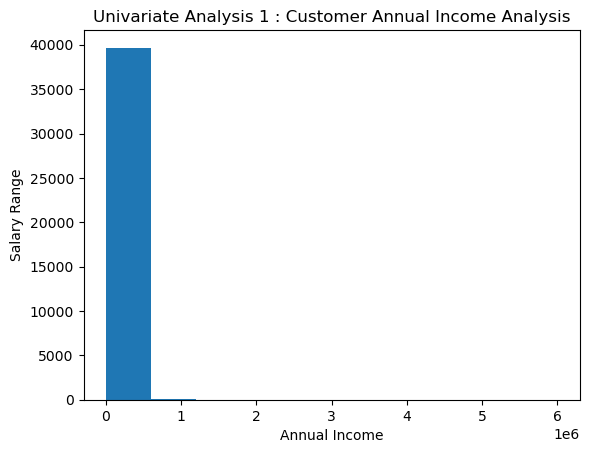

In [25]:
# annual_inc : Most of the customer has the Income from 0 - 40 k ( We could see from below Histogram)
plt.hist(bank_loan_data.annual_inc)
plt.title('Univariate Analysis 1 : Customer Annual Income Analysis')
plt.xlabel('Annual Income')
plt.ylabel('Salary Range')
plt.show()

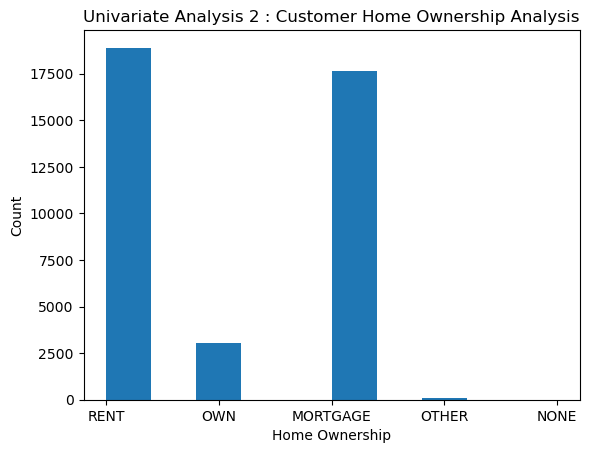

In [26]:
#  Mostly Customers has home status either RENT and MORTGAGE
plt.hist(bank_loan_data.home_ownership)
plt.title('Univariate Analysis 2 : Customer Home Ownership Analysis')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

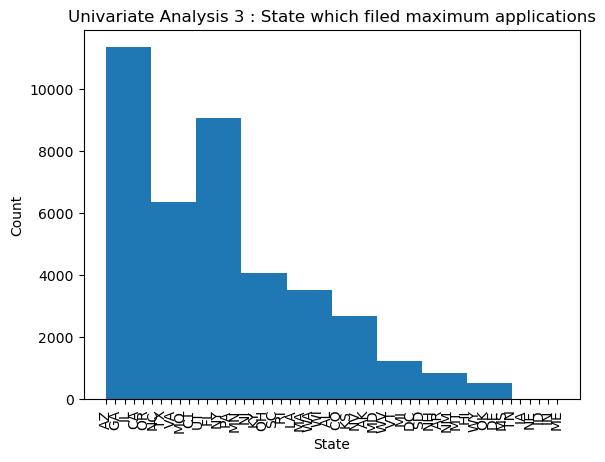

In [27]:
#State which has highest Applications filed

plt.hist(bank_loan_data.addr_state)
plt.title('Univariate Analysis 3 : State which filed maximum applications')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

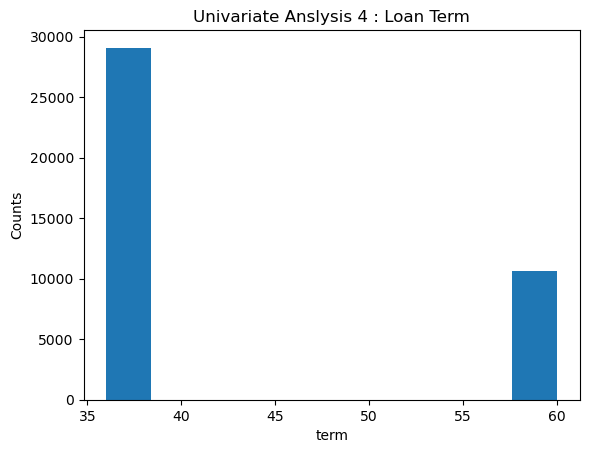

In [88]:
# Most of the customers has opted for term of 36 months
plt.hist(bank_loan_data.term)
plt.title('Univariate Anslysis 4 : Loan Term')
plt.xlabel('term')
plt.ylabel('Counts')
plt.show()

### Unordered Categorical Analysis

### 1 . Analyzing Purpose of the loan

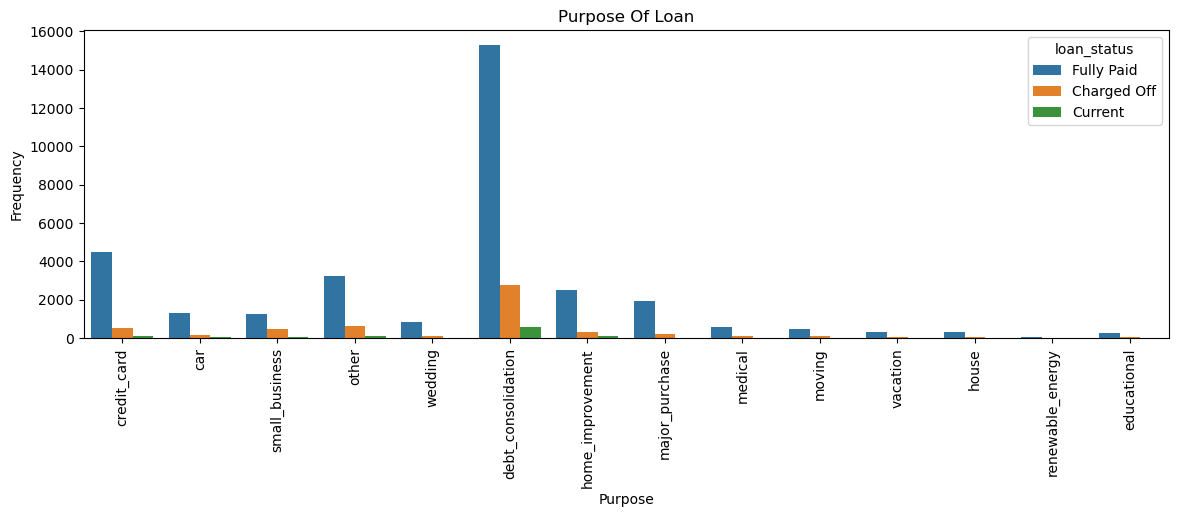

In [92]:
plt.figure(figsize=(14,4))
ax = sns.countplot(x="purpose", data=bank_loan_data, hue= 'loan_status')
ax.set_title('Purpose Of Loan')
ax.set_ylabel('Frequency')
ax.set_xlabel('Purpose')  
plt.xticks(rotation=90)
plt.show()

Outcome:

1) From above, we can say that most of Customer opted loan for debt consolidation.
2) Charged Off loan status is also high for debt consolidation.

### 2. Analyzing Home Ownership

<Figure size 1500x500 with 0 Axes>

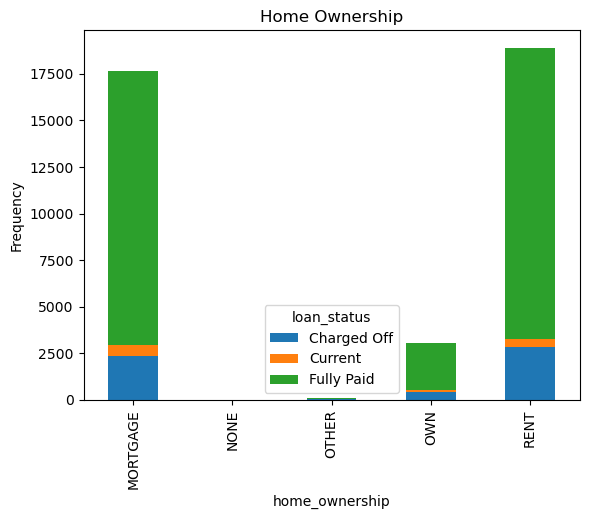

In [94]:
plt.figure(figsize=(15,5))
bank_loan_data.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.title("Home Ownership",fontdict={'fontsize':12})
plt.xlabel("home_ownership")
plt.ylabel("Frequency")
plt.show()

Outcome: 

1. From above, we can say that most of them have taken loan who are in rent or mortgage their home.
2. Charged Off loan status is also high for these two home ownership.

### Ordered Categorical Analysis

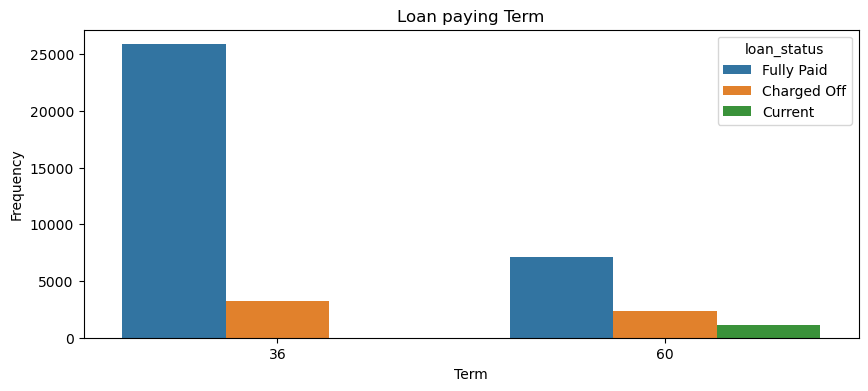

In [95]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x="term", data=bank_loan_data, hue= 'loan_status')
ax.set_title('Loan paying Term')
ax.set_ylabel('Frequency')
ax.set_xlabel('Term')  
plt.show()

Outcome: 

1. From term data, we can say that most of customers have taken loan for 36 months as compared to 60 months.
2. Charged Off loan status is also high for 60 months term compared to 36 months.

### Univariate Analysis

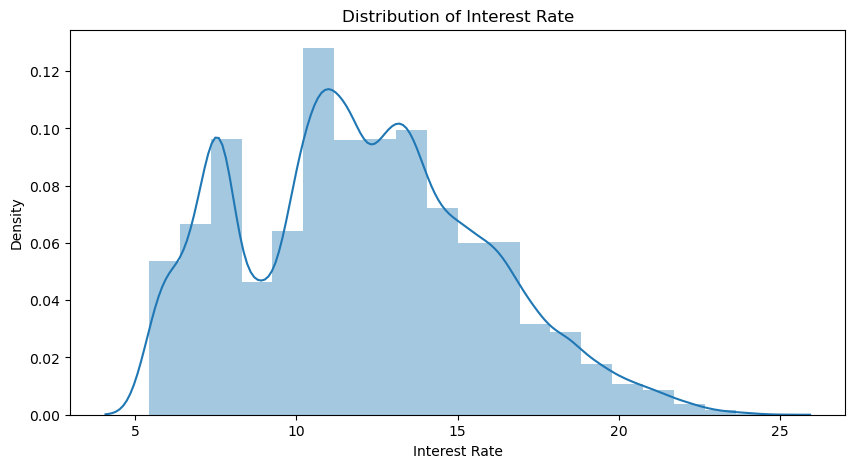

In [30]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(bank_loan_data.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

Outcome:

The interest rate is more crowded around 5-10 and 10-15 with a drop near 10

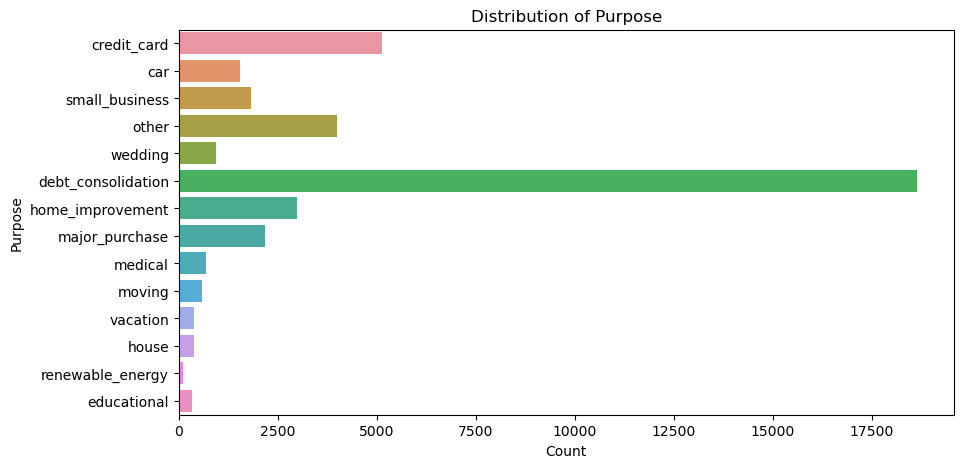

In [116]:
# Distribution of purpose
plt.figure(figsize=(10,5))
sns.countplot(y=bank_loan_data.purpose)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

Major loans are taken for debt consolidation followed by credit card

## Bivariate Analysis

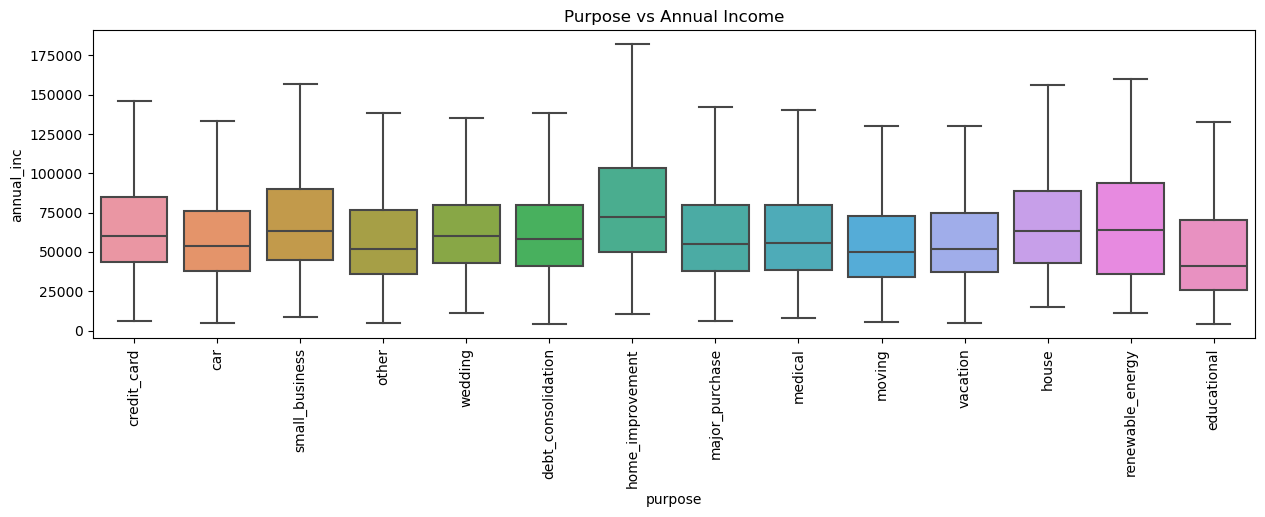

In [32]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="annual_inc", data=bank_loan_data, showfliers=False)
plt.title("Purpose vs Annual Income")
plt.xticks(rotation=90)
plt.show()

Outcome: 

In Annual Income vs Purpose variable we can say that, the borrowers who has high annual income are taking loans mostly for home improvement

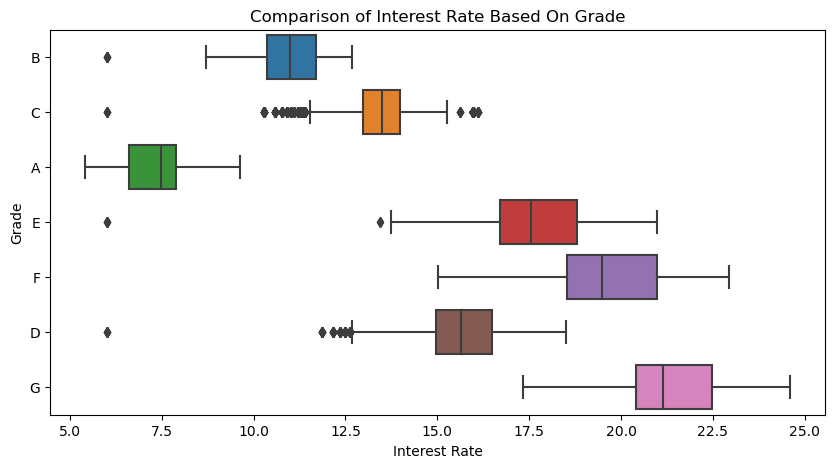

In [108]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=bank_loan_data,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()